# Load Cifar-10

In [1]:
from os import listdir
from os.path import isfile, join
import numpy
import sys
height, width, dim = 32, 32, 3
classes = 10

# this function is provided from the official site
def unpickle(file):
    import pickle
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

# from PIL import Image
# def ndarray2image (arr_data, image_fn):
#   img = Image.fromarray(arr_data, 'RGB')
#   img.save(image_fn)

# need pillow package
from scipy.misc import imsave
def ndarray2image (arr_data, image_fn):
    imsave(image_fn, arr_data)

def read_dataset(dataset_path, ouput_type):
    # define the information of images which can be obtained from official website

    ''' read training data '''
    # get the file names which start with "data_batch" (training data)
    train_fns = [fn for fn in listdir(dataset_path) if isfile(join(dataset_path, fn)) & fn.startswith("data_batch")]

    # list sorting
    train_fns.sort()

    # make a glace about the training data
    fn = train_fns[0]
    raw_data = unpickle(dataset_path + fn)

    # type of raw data
    type(raw_data)
    # <type 'dict'>

    # check keys of training data
    raw_data_keys = raw_data.keys()
    # output ['data', 'labels', 'batch_label', 'filenames']

    # check dimensions of ['data']
    raw_data['data'].shape
    # (10000, 3072)

    # concatenate pixel (px) data into one ndarray [img_px_values]
    # concatenate label data into one ndarray [img_lab]
    img_px_values = 0
    img_lab = 0
    for fn in train_fns:
        raw_data = unpickle(dataset_path + fn)
        if fn == train_fns[0]:
            img_px_values = raw_data['data']
            img_lab = raw_data['labels']
        else:
            img_px_values = numpy.vstack((img_px_values, raw_data['data']))
            img_lab = numpy.hstack((img_lab, raw_data['labels']))

    X_train = []
    
    if (ouput_type == "vec"):
        # set X_train as 1d-ndarray (50000,3072)
        X_train = img_px_values
    elif (ouput_type == "img"):
        # set X_train as 3d-ndarray (50000,32,32,3)
        X_train = numpy.asarray([numpy.dstack((r[0:(width*height)].reshape(height,width),
                                               r[(width*height):(2*width*height)].reshape(height,width),
                                               r[(2*width*height):(3*width*height)].reshape(height,width)
                                             )) for r in img_px_values])
    else:
        sys.exit("Error ouput_type")

    Y_train = numpy.array(img_lab)

    # check is same or not!
    # lab_eql = numpy.array_equal([(numpy.argmax(r)) for r in Y_train], numpy.array(img_lab))

    # draw one image from the pixel data
    if (ouput_type == "img"):
        ndarray2image(X_train[0],"test_image.png")

    # print the dimension of training data
    print ('X_train shape:', X_train.shape)
    print ('Y_train shape:', Y_train.shape)

    ''' read testing data '''
    # get the file names which start with "test_batch" (testing data)
    test_fns = [fn for fn in listdir(dataset_path) if isfile(join(dataset_path, fn)) & fn.startswith("test_batch")]

    # read testing data
    fn = test_fns[0]
    raw_data = unpickle(dataset_path + fn)
    print ('testing file', dataset_path + fn)

    # type of raw data
    type(raw_data)

    # check keys of testing data
    raw_data_keys = raw_data.keys()
    # ['data', 'labels', 'batch_label', 'filenames']

    img_px_values = raw_data['data']

    # check dimensions of data
    print ("dim(data)", numpy.array(img_px_values).shape)
    # dim(data) (10000, 3072)

    img_lab = raw_data['labels']
    # check dimensions of labels
    print ("dim(labels)",numpy.array(img_lab).shape)
    # dim(data) (10000,)

    if (ouput_type == "vec"):
        X_test = img_px_values
    elif (ouput_type == "img"):
        X_test = numpy.asarray([numpy.dstack((r[0:(width*height)].reshape(height,width),
                                              r[(width*height):(2*width*height)].reshape(height,width),
                                              r[(2*width*height):(3*width*height)].reshape(height,width)
                                            )) for r in img_px_values])
    else:
        sys.exit("Error ouput_type")

    Y_test = numpy.array(raw_data['labels'])

    # scale image data to range [0, 1]
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    # print the dimension of training data
    print ('X_test shape:', X_test.shape)
    print ('Y_test shape:', Y_test.shape)
    return X_train, X_test, Y_train, Y_test

import csv
def write_csv(output_fn, fit_log):
    history_fn = output_fn + '.csv'
    with open(history_fn, 'w') as csv_file:
        w = csv.writer(csv_file, lineterminator='\n')
        temp = numpy.array(list(fit_log.history.values()))
        w.writerow(list(fit_log.history.keys()))
        for i in range(temp.shape[1]):
            w.writerow(temp[:,i])


# Load libraries

In [2]:
# import [package name] as [name abbr.]
# python 處理數字跟 tensor 運算的主要套件
import numpy as np
# google 的 NN coding 套件
import tensorflow as tf

# 有可能會出現警告，但是可以不用理他
# c:\users\silver\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36:
# FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating`
# is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
# from ._conv import register_converters as _register_converters

c:\users\silver\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Load Cifar-10

In [3]:
# set dataset path
dataset_path = './cifar_10/'
classes = 10
X_train, X_test, Y_train, Y_test = read_dataset(dataset_path, "img") 

c:\users\silver\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000,)
testing file ./cifar_10/test_batch
dim(data) (10000, 3072)
dim(labels) (10000,)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000,)


#  Define Model Structure (tf.leyers)

In [4]:
def conv_blk (inputs, name = 'conv_blk'):
    with tf.name_scope(name):
        c1 = tf.layers.conv2d(inputs,filters=32,kernel_size=[3,3],strides=(1,1),padding='same')
        c1_relu = tf.nn.relu(c1)
        c2 = tf.layers.conv2d(c1_relu,filters=32,kernel_size=[3,3],strides=(1,1),padding='valid')
        c2_relu = tf.nn.relu(c2)
        mxp = tf.layers.max_pooling2d(c2_relu,pool_size=[2,2],strides=(2,2))
        do = tf.layers.dropout(mxp,rate=0.2)
        return do

In [5]:
# Define Model Input (x) and Output (y_),  y_ = f(x)
x = tf.placeholder(tf.float32, [None, 32,32,3])
y_ = tf.placeholder(tf.int32, [None])
y_one = tf.one_hot(y_,classes)

# convolutional part
h1 = conv_blk(x, name='conv_blk1')
h2 = conv_blk(h1, name='conv_blk2')

flt = tf.layers.flatten(h2)

# fully connected part
f1 = tf.layers.dense(flt,512,activation=None)
f1_relu = tf.nn.relu(f1)
f1_do = tf.layers.dropout(f1_relu,rate=0.5)
y = tf.layers.dense(f1_relu,10,activation=None)

In [6]:
# Define the Model Loss (4)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_one, logits=y))

# Define the Optimizer (5)
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

y_pred = tf.argmax(tf.nn.softmax(y), 1, output_type=tf.int32)

# Accuracy of the Model
correct_prediction = tf.equal(y_pred, y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# initialize the model
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Data iterator

In [7]:
def get_batch(X, Y, batch_size = 128):
    # print ('shuffle training dataset')
    batch_size = 128
    idx = np.arange(len(X))    
    while True:
        numpy.random.shuffle(idx)
        tb = int(len(X)/batch_size)
        #print('total batches %d' % tb)
        for b_idx in range(tb):
            tar_idx = idx[(b_idx*batch_size):((b_idx+1)*batch_size)]
            t_batch_x = X[tar_idx]
            t_batch_y = Y[tar_idx]
            # print(b_idx, t_batch_x.shape, t_batch_y.shape)
            yield t_batch_x, t_batch_y

# Training & Evaluation

In [8]:
batches = get_batch(X_train, Y_train, 128)
# Train Model for 1000 steps
hist_train_acc = []
hist_valid_acc = []
for step in range(5000):
    batch_xs, batch_ys = next(batches)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if (step % 250 == 0):
        # get training accr
        idx = np.arange(len(X_train))    
        tb = int(len(X_train)/500)
        acc_train= []
        for b_idx in range(tb):
            tar_idx = idx[(b_idx*500):((b_idx+1)*500)]
            t_batch_x = X_train[tar_idx]
            t_batch_y = Y_train[tar_idx]
        acc_train.append(sess.run(accuracy, feed_dict={x: t_batch_x, y_: t_batch_y}))
        # get test accr
        idx = np.arange(len(X_test))    
        tb = int(len(X_test)/500)
        acc_valid= []
        for b_idx in range(tb):
            tar_idx = idx[(b_idx*500):((b_idx+1)*500)]
            t_batch_x = X_test[tar_idx]
            t_batch_y = Y_test[tar_idx]
        acc_valid.append(sess.run(accuracy, feed_dict={x: t_batch_x, y_: t_batch_y}))
        
        print("Accuracy: [T] %.4f / [V] %.4f" % (np.mean(acc_train),np.mean(acc_valid)))
        hist_train_acc.append(np.mean(acc_train))
        hist_valid_acc.append(np.mean(acc_valid))

Accuracy: [T] 0.1260 / [V] 0.1220
Accuracy: [T] 0.5200 / [V] 0.5080
Accuracy: [T] 0.6320 / [V] 0.5780
Accuracy: [T] 0.6560 / [V] 0.6260
Accuracy: [T] 0.6880 / [V] 0.6300
Accuracy: [T] 0.7420 / [V] 0.6740
Accuracy: [T] 0.7640 / [V] 0.6940
Accuracy: [T] 0.7960 / [V] 0.7100
Accuracy: [T] 0.8320 / [V] 0.7260
Accuracy: [T] 0.7980 / [V] 0.6760
Accuracy: [T] 0.8520 / [V] 0.7220
Accuracy: [T] 0.9040 / [V] 0.7440
Accuracy: [T] 0.8960 / [V] 0.7200
Accuracy: [T] 0.9160 / [V] 0.7180
Accuracy: [T] 0.9360 / [V] 0.7180
Accuracy: [T] 0.9440 / [V] 0.7120
Accuracy: [T] 0.9540 / [V] 0.7000
Accuracy: [T] 0.9660 / [V] 0.7320
Accuracy: [T] 0.9500 / [V] 0.7120
Accuracy: [T] 0.9840 / [V] 0.7400


In [9]:
sess.close()

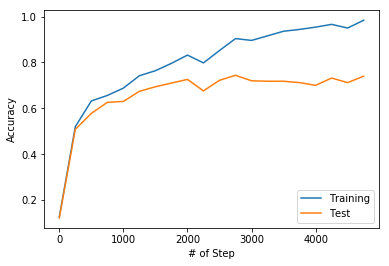

In [10]:
import matplotlib.pyplot as plt
x = [x*250 for x in range(len(hist_train_acc))]
line_train, = plt.plot(x, hist_train_acc, label='Training')
line_test, = plt.plot(x, hist_valid_acc, label='Test')
plt.xlabel('# of Step')
plt.ylabel('Accuracy')
plt.legend(handles=[line_train,line_test], loc=4)
plt.show()